In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# from subprocess import check_output
import os
# directory_path = r"D:\Datasets\sign_lang"
# file_list = os.listdir(directory_path)
# print(file_list)


['Sign-language-digits-dataset', 'X.npy', 'Y.npy']


# There are 2062 sign language Digit Images in this dataset.
Since there are 10 digits from 0-9, there are 10 unique sign images.
In the beginning,use 0 and 1
In the data, the hand sign for 0 is between indices 204 and 408. There are 205 samples for 0.
Also, the hand sign for 1 is between indices 822 and 1027. There are 206 samples.
Thus use 205 samples from each class 
 preparer arrays X and Y, where X is  Image array(Features) and Y is  label array (0 and 1).

In [7]:
x_l = np.load(r'D:\Datasets\sign_lang\Sign-language-digits-dataset\X.npy')
Y_l = np.load(r'D:\Datasets\sign_lang\Sign-language-digits-dataset\Y.npy')
x_l,Y_l

(array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
          0.5137255 , 0.5019608 ],
         [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
          0.5176471 , 0.50980395],
         [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
          0.5254902 , 0.5137255 ],
         ...,
         [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
          0.54509807, 0.53333336],
         [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
          0.53333336, 0.52156866],
         [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
          0.52156866, 0.50980395]],
 
        [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
          0.4509804 , 0.44313726],
         [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
          0.4627451 , 0.4509804 ],
         [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
          0.4745098 , 0.4627451 ],
         ...,
         [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
          0.39607844, 0.

(-0.5, 63.5, 63.5, -0.5)

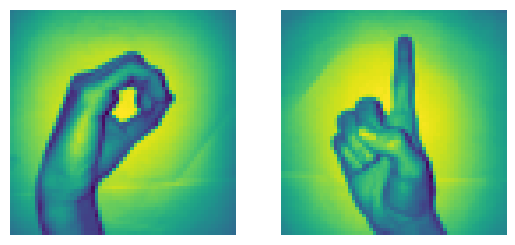

In [5]:
img_size = 64 # 64 pixels in each image(height and wight is 64)
plt.subplot(1, 2, 1) # 1 row 2 columns in 1st
#  from the matplotlib.pyplot library. x_l[260] is referring to the image data at index 260 in the x_l array for number 0
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
#  from the matplotlib.pyplot library. x_l[900] is referring to the image data at index 900 in the x_l array for number 1
plt.axis('off')

In [8]:
# Join a sequence of arrays along an row axis.
# from 0 to 204 is zero sign and from 205 to 410 is one sign
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)
# 0 is between indices 204 and 408, 1 is between 822 to 1027
z = np.zeros(205) # 205 zeros
o = np.ones(205) # 205 ones
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
# contain 410 205 images of 0 and 205 of 1
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [10]:
X,Y

(array([[[0.43529412, 0.44705883, 0.4509804 , ..., 0.41568628,
          0.40392157, 0.39215687],
         [0.44705883, 0.45882353, 0.4627451 , ..., 0.42745098,
          0.41960785, 0.40392157],
         [0.45490196, 0.46666667, 0.47843137, ..., 0.4392157 ,
          0.43529412, 0.42352942],
         ...,
         [0.58431375, 0.6039216 , 0.62352943, ..., 0.5372549 ,
          0.52156866, 0.5058824 ],
         [0.5411765 , 0.5568628 , 0.57254905, ..., 0.5254902 ,
          0.5137255 , 0.5019608 ],
         [0.5176471 , 0.5372549 , 0.5529412 , ..., 0.5176471 ,
          0.5058824 , 0.49411765]],
 
        [[0.5137255 , 0.5254902 , 0.53333336, ..., 0.46666667,
          0.45882353, 0.4509804 ],
         [0.5254902 , 0.5372549 , 0.54509807, ..., 0.4745098 ,
          0.47058824, 0.45882353],
         [0.53333336, 0.54509807, 0.5529412 , ..., 0.48235294,
          0.4745098 , 0.4627451 ],
         ...,
         [0.47843137, 0.4862745 , 0.4862745 , ..., 0.41568628,
          0.40784314, 0.

In [12]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [13]:
# X is 3D array so flatten it to 2D array
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)
# 48 images, each with 4096 pixels in the training array X.
# And 62 images of the same pixel density 4096 in the test array.

X train flatten (348, 4096)
X test flatten (62, 4096)


In [14]:
# transposing all train and test values
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [15]:
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) # dimension =4096 , 4096 rows and 1 columns of 0.01  
    b = 0.0
    return w, b
w,b = initialize_weights_and_bias(4096)

In [16]:
a=np.full((10,1),0.01)
a

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

In [18]:
#  calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
y_head = sigmoid(0)
y_head

0.5

In [19]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost

1.First, we take a random datapoint in our graph and find its slope.
2.Then we find the direction in which the value loss function decreases.
3.Update the weights using the above formula. (This method is also called backpropagation)
4.Select the next point by taking a stepsize of α.
5.Repeat.

In [20]:
#  In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [21]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [22]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Cost after iteration 0: 14.014222
Cost after iteration 10: 1.918535
Cost after iteration 20: 1.750365
Cost after iteration 30: 1.653524
Cost after iteration 40: 1.560956
Cost after iteration 50: 1.457745
Cost after iteration 60: 1.335495
Cost after iteration 70: 1.191800
Cost after iteration 80: 1.027511
Cost after iteration 90: 0.843100
Cost after iteration 100: 0.639890
Cost after iteration 110: 0.432595
Cost after iteration 120: 0.278192
Cost after iteration 130: 0.221609
Cost after iteration 140: 0.208972
Cost after iteration 150: 0.203415
Cost after iteration 160: 0.198754
Cost after iteration 170: 0.194446
Cost after iteration 180: 0.190433
Cost after iteration 190: 0.186683


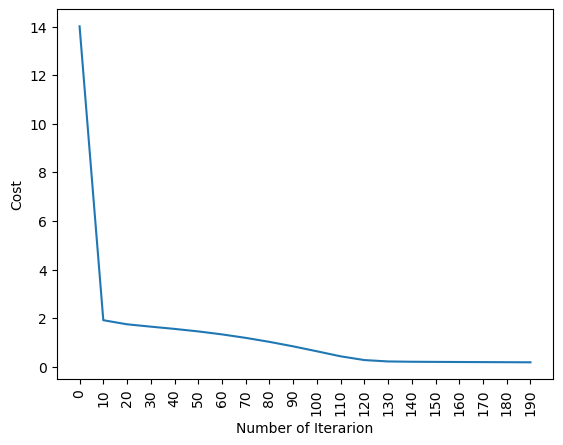

In [23]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)


In [24]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [26]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


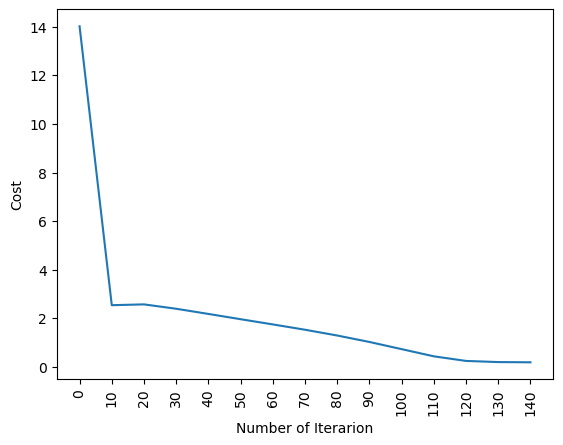

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [27]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)
